In [2]:
import numpy as np
import pandas as pd

def generate_dataset(overlap=True, n_samples=100):
    np.random.seed(42)  
    if overlap:
        centers_linear = [(0, 0), (1.5, 1.5), (3, 0)]
        spread = 1.0
    else:
        # Far centers -> non-overlapping
        centers_linear = [(0, 0), (5, 5), (10, 0)]
        spread = 0.5

    linear_data = []
    for i, center in enumerate(centers_linear):
        points = np.random.randn(n_samples, 2) * spread + np.array(center)
        labels = np.full((n_samples,), i)
        linear_data.append(np.column_stack((points, labels)))
    linear_data = np.vstack(linear_data)

    # ---------- Non-linear Separable Part ----------
    if overlap:
        # Circle inside another (close distance)
        radius_inner = 2
        radius_outer = 3.5
    else:
        # Circle far apart
        radius_inner = 2
        radius_outer = 8

    angles_inner = np.random.rand(n_samples) * 2 * np.pi
    inner_circle = np.column_stack((radius_inner * np.cos(angles_inner) + 10,
                                    radius_inner * np.sin(angles_inner) + 10))
    labels_inner = np.full((n_samples,), 0)  # class 0

    angles_outer = np.random.rand(n_samples) * 2 * np.pi
    outer_circle = np.column_stack((radius_outer * np.cos(angles_outer) + 10,
                                    radius_outer * np.sin(angles_outer) + 10))
    labels_outer = np.full((n_samples,), 1)  # class 1

    # Add a third random cluster for variety
    rand_cluster = np.random.randn(n_samples, 2) * (spread if overlap else 0.5) + (15, 15)
    labels_rand = np.full((n_samples,), 2)

    nonlinear_data = np.vstack([
        np.column_stack((inner_circle, labels_inner)),
        np.column_stack((outer_circle, labels_outer)),
        np.column_stack((rand_cluster, labels_rand))
    ])

    # ---------- Combine Linear + Non-linear ----------
    final_data = np.vstack([linear_data, nonlinear_data])
    return final_data

# Generate datasets
overlap_data = generate_dataset(overlap=True)
non_overlap_data = generate_dataset(overlap=False)

# Save as CSV
pd.DataFrame(overlap_data, columns=["x", "y", "label"]).to_csv("overlapping.csv", index=False)
pd.DataFrame(non_overlap_data, columns=["x", "y", "label"]).to_csv("non_overlapping.csv", index=False)



In [3]:
import pandas as pd

df_overlap = pd.read_csv("overlapping.csv")
df_nonoverlap = pd.read_csv("non_overlapping.csv")


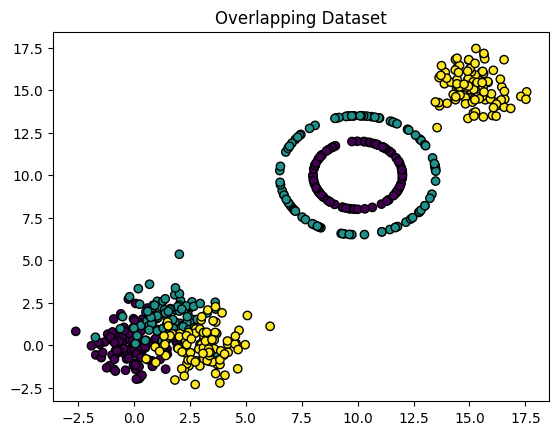

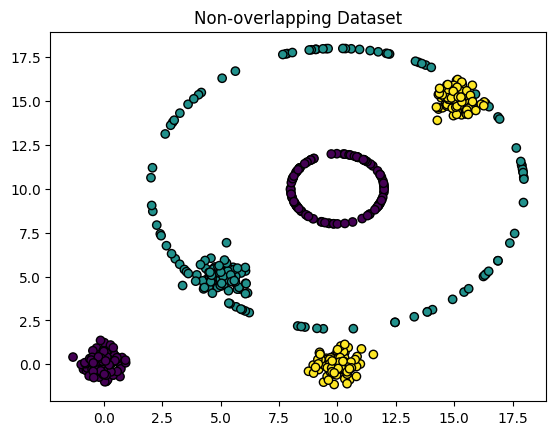

In [4]:
import matplotlib.pyplot as plt

# Overlapping
plt.scatter(df_overlap['x'], df_overlap['y'], c=df_overlap['label'], cmap='viridis', edgecolors='k')
plt.title("Overlapping Dataset")
plt.show()

# Non-overlapping
plt.scatter(df_nonoverlap['x'], df_nonoverlap['y'], c=df_nonoverlap['label'], cmap='viridis', edgecolors='k')
plt.title("Non-overlapping Dataset")
plt.show()


In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC

# def plot_svm_boundary(X, y, title):
#     clf = SVC(kernel='rbf', C=1, gamma='scale', decision_function_shape='ovr')
#     clf.fit(X, y)
    
#     # Meshgrid for plotting
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
#                          np.linspace(y_min, y_max, 500))
    
#     # Predict for each point in meshgrid
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
    
#     # Plot decision regions
#     plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Set1, edgecolors='k')
    
#     # Highlight support vectors
#     plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
#                 s=100, facecolors='none', edgecolors='black', linewidths=1.5, label='Support Vectors')
    
#     plt.title(title)
#     plt.legend()



# # Extract features & labels
# X_non_overlap = df_nonoverlap[['x', 'y']].values
# y_non_overlap = df_nonoverlap['label'].values

# X_overlap = df_overlap[['x', 'y']].values
# y_overlap = df_overlap['label'].values

# # -------------------
# # Plot both datasets
# # -------------------
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plot_svm_boundary(X_non_overlap, y_non_overlap, "Non-Overlapping (3 Classes)")

# plt.subplot(1, 2, 2)
# plot_svm_boundary(X_overlap, y_overlap, "Overlapping (3 Classes)")

# plt.tight_layout()
# plt.show()


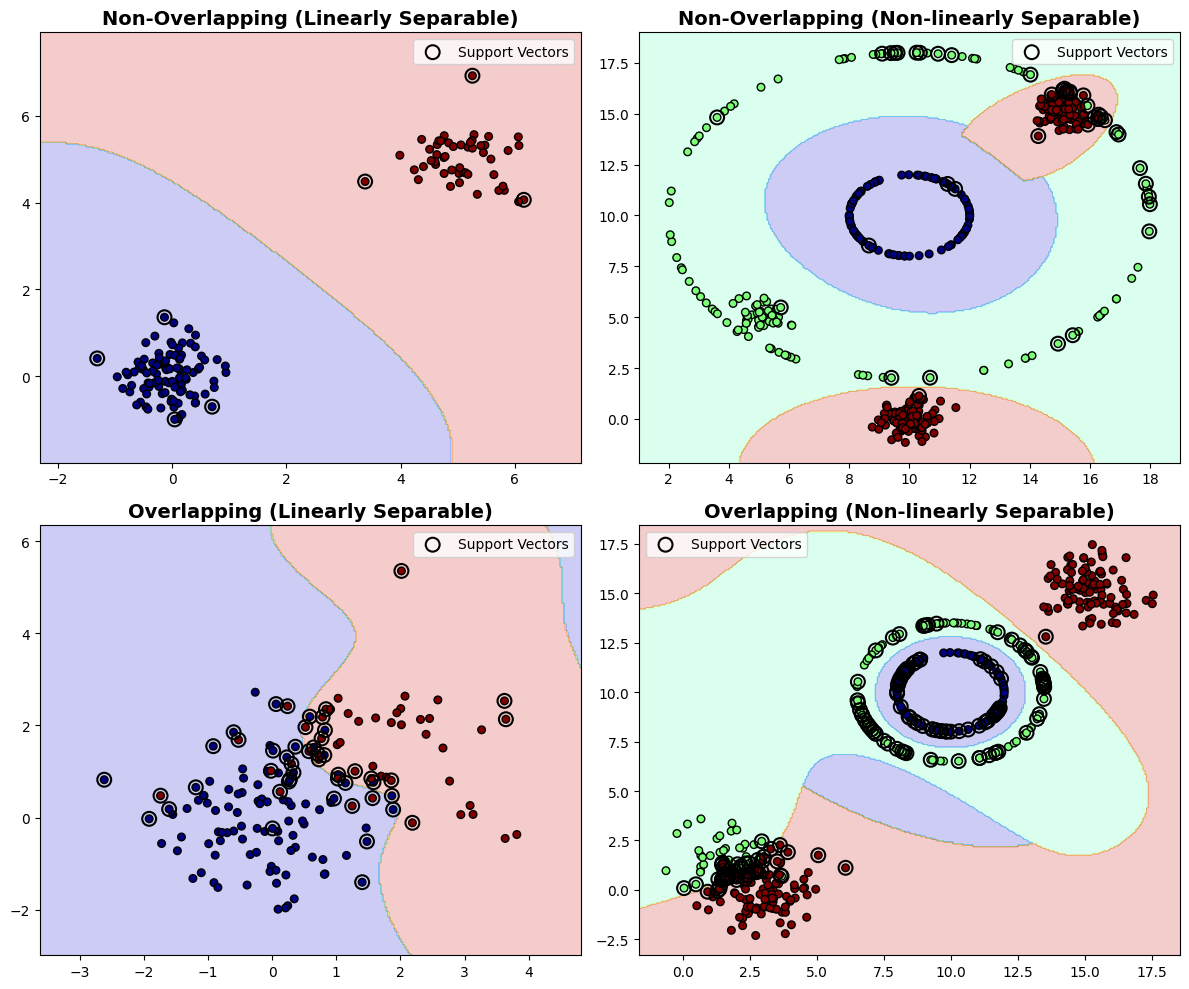

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC


def plot_svm_with_labels(X, y, title, separability_label):
    # Train SVM
    clf = SVC(kernel='rbf', C=100, gamma='scale', decision_function_shape='ovo')
    clf.fit(X, y)

    # Create mesh for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap="jet")

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="jet", edgecolors='k')

    # Plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='black', linewidths=1.5,
                label='Support Vectors')
    plt.title(f"{title} ({separability_label})", fontsize=14, fontweight='bold')
    plt.legend()
X1 = df_nonoverlap.iloc[:150, :2].values  
y1 = df_nonoverlap.iloc[:150, 2].values

X2 = df_nonoverlap.iloc[150:, :2].values
y2 = df_nonoverlap.iloc[150:, 2].values

X3 = df_overlap.iloc[:150, :2].values     
y3 = df_overlap.iloc[:150, 2].values

X4 = df_overlap.iloc[150:, :2].values      
y4 = df_overlap.iloc[150:, 2].values

# --- Plot all four ---
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plot_svm_with_labels(X1, y1, "Non-Overlapping", "Linearly Separable")

plt.subplot(2, 2, 2)
plot_svm_with_labels(X2, y2, "Non-Overlapping", "Non-linearly Separable")

plt.subplot(2, 2, 3)
plot_svm_with_labels(X3, y3, "Overlapping", "Linearly Separable")

plt.subplot(2, 2, 4)
plot_svm_with_labels(X4, y4, "Overlapping", "Non-linearly Separable")

plt.tight_layout()
plt.show()
